## DaVinvi team project - Erdos Institute Spring 2022

The Birds 400 dataset includes 400 bird species with 58388 training images, 2000 test images and 2000 validation images. Data are available at: https://www.kaggle.com/datasets/gpiosenka/100-bird-species

## EDA

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
from google.colab import files

files.upload()  

KeyboardInterrupt: ignored

In [ ]:
! mkdir ~/.kaggle 

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
 ! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! mkdir  '/content/gdrive'

mkdir: cannot create directory ‘/content/gdrive/data’: Operation not supported


In [ ]:
! kaggle datasets list -s 'BIRDS 400'

ref                                     title                                     size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------  ----------------------------------------  ----  -------------------  -------------  ---------  ---------------  
gpiosenka/100-bird-species              BIRDS 400 - SPECIES IMAGE CLASSIFICATION   1GB  2022-02-17 15:49:59          26219        769  0.85294116       
akimball002/hummingbirds-at-my-feeders  Hummingbirds at my feeders                20MB  2020-06-19 22:41:06             59          7  0.8125           
nigarkhasayeva/bbirds-400               bbirds_400                                 1GB  2022-03-29 01:55:35              0          0  0.11764706       


In [ ]:
!kaggle datasets download -d 'gpiosenka/100-bird-species' -p /content/kaggle/

 99% 1.48G/1.49G [00:18<00:00, 114MB/s]
100% 1.49G/1.49G [00:18<00:00, 84.7MB/s]


In [ ]:
! ls

 birds.csv		       'images to test'		       test
'birds latin names.csv'         kaggle			       train
 class_dict.csv		        kaggle.json		       valid
 EfficientNetB4-BIRDS-0.99.h5   my_csv-2-17-2022-1-17-48.csv
 gdrive			        sample_data


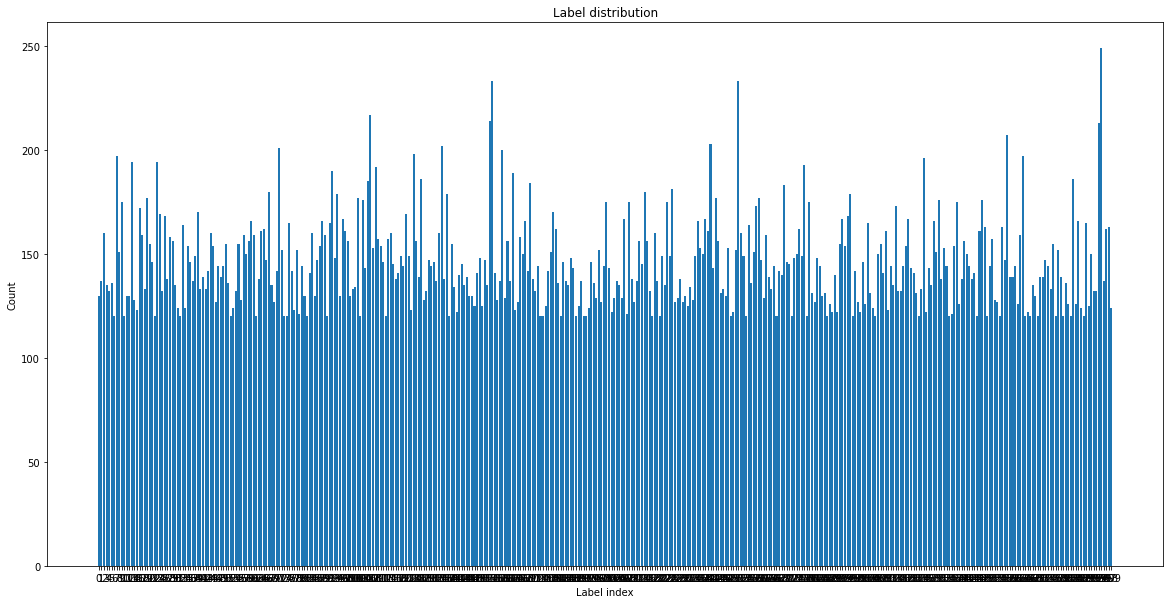

In [ ]:
train =  "train/"
train_dic = {}
for name in os.listdir(train):
    if os.path.isdir(os.path.join(train, name)):
        train_dic[name] = len([i for i in os.listdir(os.path.join(train, name))])
# print(train)


plt.figure(figsize=(20, 10))
plt.bar(range(len(train_dic)), list(train_dic.values()), align='center')
plt.xticks(range(len(train_dic)))
plt.xlabel('Label index')
plt.ylabel('Count')
plt.title('Label distribution')
plt.show()


In [ ]:
!cp -r valid/E* valid10/

In [ ]:
!mkdir valid10

In [ ]:
# Importing all necessary libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import layers
from keras import backend as K

In [ ]:
train_data_dir = 'train10/'
validation_data_dir = 'valid10/'
nb_train_samples =sum([len(files) for r, d, files in os.walk(train_data_dir)])
nb_validation_samples = sum([len(files) for r, d, files in os.walk(validation_data_dir )])
epochs = 10
batch_size = 32

In [ ]:
## we first make an empty model
## Sequential means we'll make a group
## of a linear stack of layers
model = Sequential()

In [ ]:
## adding our first convolutional layer

## Conv2D(32, specifies that we want a convolutional layer with depth 32
## (3,3) is our sliding grid size
## We're using the relu activation function
## and our images are a gray scale value for 28X28 pixels, hence the input_shape
model.add( layers.Conv2D( 32, (3,3), activation='relu', input_shape=(224,224,3,)  ) )


## adding our first Max Pooling layer
## MaxPooling2D((2,2) tells python we want to add
## a max pooling layer that uses a (2,2) square grid
## strides = 2, sets the stride value to 2
model.add( layers.MaxPooling2D( (2,2), strides = 2 ) )


## Add another layer, alternating between conv and pool
model.add( layers.Conv2D(64, (3,3), activation='relu'))
model.add( layers.MaxPooling2D( (2,2), strides=2) )



In [ ]:
## Now we'll add the fully connected layer

## .Flatten() will flatten the data for us,
## meaning the last output data will turn into 
## a vector
model.add( layers.Flatten() )

## We've seen these before
## Then we add a single dense hidden layer
## This is 64 nodes high
model.add(layers.Dense(64, activation='relu'))


## Finally an output layer
#this needs to be the same as the number of classes
model.add(layers.Dense(17, activation='softmax'))

In [ ]:
## We've seen this before in the last notebook
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
 
test_datagen = ImageDataGenerator(rescale=1. / 255)
 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical")
 
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical")
 
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Found 2353 images belonging to 17 classes.
Found 85 images belonging to 17 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
73/73 [==============================] - 178s 2s/step - loss: 3.4413 - accuracy: 0.1710 - val_loss: 1.7197 - val_accuracy: 0.4531
Epoch 2/10
73/73 [==============================] - 175s 2s/step - loss: 1.7108 - accuracy: 0.4791 - val_loss: 1.1304 - val_accuracy: 0.6875
Epoch 3/10
73/73 [==============================] - 175s 2s/step - loss: 1.2204 - accuracy: 0.6458 - val_loss: 0.7258 - val_accuracy: 0.7656
Epoch 4/10
73/73 [==============================] - 175s 2s/step - loss: 0.9371 - accuracy: 0.7316 - val_loss: 0.6274 - val_accuracy: 0.8125
Epoch 5/10
73/73 [==============================] - 174s 2s/step - loss: 0.8102 - accuracy: 0.7643 - val_loss: 0.5642 - val_accuracy: 0.8594
Epoch 6/10
73/73 [==============================] - 174s 2s/step - loss: 0.6386 - accuracy: 0.8040 - val_loss: 0.6705 - val_accuracy: 0.8125
Epoch 7/10
73/73 [==============================] - 173s 2s/step - loss: 0.5769 - accuracy: 0.8328 - val_loss: 0.3801 - val_accuracy: 0.8750
Epoch 8/10
73

In [ ]:
history_dict = history.history

In [ ]:
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


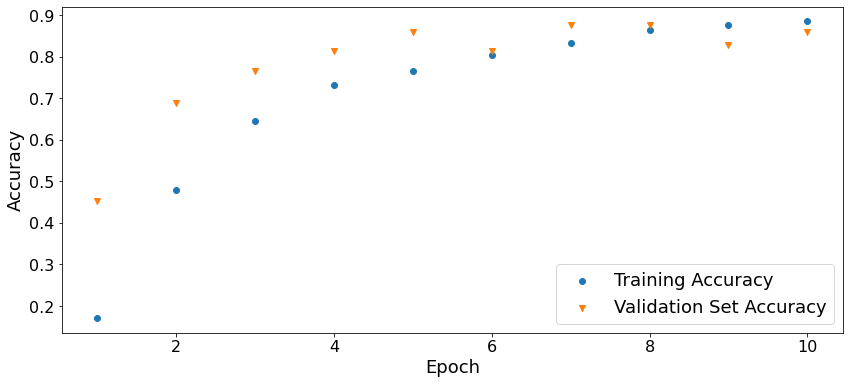

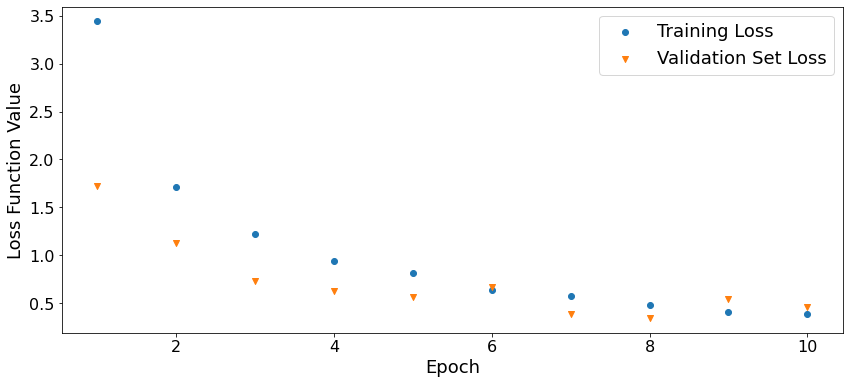

In [ ]:
plt.figure(figsize = (14,6))

plt.scatter(range(1,n_epochs+1), history_dict['accuracy'], label = "Training Accuracy")
plt.scatter(range(1,n_epochs+1), history_dict['val_accuracy'], marker='v', label = "Validation Set Accuracy")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=18)

plt.show()


plt.figure(figsize = (14,6))

plt.scatter(range(1,n_epochs+1), history_dict['loss'], label = "Training Loss")
plt.scatter(range(1,n_epochs+1), history_dict['val_loss'], marker='v', label = "Validation Set Loss")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Loss Function Value", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=18)

plt.show()